# Notebook 3: merging sentiment analysis of tweets with bitcoin prices

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cleaning and merging the two datasets

In [9]:
bitcoin_prices = pd.read_csv("bitstamp.csv")

In [10]:
bitcoin_prices

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4572252,1600041360,10324.35,10325.89,10324.35,10325.89,0.081143,837.754188,10324.419779
4572253,1600041420,10331.41,10331.97,10326.68,10331.97,0.572817,5918.028741,10331.444396
4572254,1600041480,10327.20,10331.47,10321.33,10331.47,2.489909,25711.238323,10326.175283
4572255,1600041540,10330.02,10334.78,10328.64,10334.78,4.572660,47253.747619,10333.972651


In [11]:
#convert 
from datetime import datetime
bitcoin_prices["Timestamp"]= bitcoin_prices["Timestamp"].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S') )

In [12]:
bitcoin_prices.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4572252,2020-09-13 23:56:00,10324.35,10325.89,10324.35,10325.89,0.081143,837.754188,10324.419779
4572253,2020-09-13 23:57:00,10331.41,10331.97,10326.68,10331.97,0.572817,5918.028741,10331.444396
4572254,2020-09-13 23:58:00,10327.20,10331.47,10321.33,10331.47,2.489909,25711.238323,10326.175283
4572255,2020-09-13 23:59:00,10330.02,10334.78,10328.64,10334.78,4.572660,47253.747619,10333.972651
4572256,2020-09-14 00:00:00,10338.82,10338.82,10332.37,10332.37,1.292006,13349.565122,10332.429402


In [13]:
start_date = '2018-04-16'
end_date = '2020-11-20'
mask = (bitcoin_prices['Timestamp'] >= start_date) & (bitcoin_prices['Timestamp'] <= end_date)
bitcoin_prices = bitcoin_prices.loc[mask]
bitcoin_prices.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4572252,2020-09-13 23:56:00,10324.35,10325.89,10324.35,10325.89,0.081143,837.754188,10324.419779
4572253,2020-09-13 23:57:00,10331.41,10331.97,10326.68,10331.97,0.572817,5918.028741,10331.444396
4572254,2020-09-13 23:58:00,10327.20,10331.47,10321.33,10331.47,2.489909,25711.238323,10326.175283
4572255,2020-09-13 23:59:00,10330.02,10334.78,10328.64,10334.78,4.572660,47253.747619,10333.972651
4572256,2020-09-14 00:00:00,10338.82,10338.82,10332.37,10332.37,1.292006,13349.565122,10332.429402


In [14]:
bitcoin_prices.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [15]:
bitcoin_prices["Timestamp"] = pd.to_datetime(bitcoin_prices['Timestamp'])

<ipython-input-15-f868889ea416>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_prices["Timestamp"] = pd.to_datetime(bitcoin_prices['Timestamp'])


In [16]:
bicoin_prices=bitcoin_prices.groupby(pd.Grouper(key='Timestamp',freq='H'))['Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
      'Volume_(Currency)', 'Weighted_Price'].mean()

<ipython-input-16-e57ee6d96e64>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bicoin_prices=bitcoin_prices.groupby(pd.Grouper(key='Timestamp',freq='H'))['Open', 'High', 'Low', 'Close', 'Volume_(BTC)',


In [17]:
# data re-sampled based on an hour
bitcoin_prices=bitcoin_prices.resample('H', on= "Timestamp")['Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
      'Volume_(Currency)', 'Weighted_Price'].mean().reset_index()
#data.resample('H', on='created_at').price.sum()


In [18]:
bitcoin_prices

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2018-04-16 00:00:00,8372.504667,8380.823833,8364.678500,8373.761167,8.896991,74596.755687,8373.051181
1,2018-04-16 01:00:00,8368.185833,8376.746167,8361.826500,8368.242500,10.452368,87602.420848,8369.721091
2,2018-04-16 02:00:00,8200.823333,8209.884333,8190.136167,8197.195167,26.472746,216552.726250,8199.757776
3,2018-04-16 03:00:00,8173.781500,8180.905167,8165.713167,8173.870167,5.685816,46467.996262,8173.793540
4,2018-04-16 04:00:00,8156.707167,8163.208833,8151.543167,8156.481667,4.695646,38287.282707,8156.594411
...,...,...,...,...,...,...,...,...
21164,2020-09-13 20:00:00,10305.338000,10307.544167,10301.688167,10304.580333,1.500647,15463.513838,10305.393489
21165,2020-09-13 21:00:00,10314.423333,10317.335667,10311.257167,10313.530000,1.350191,13928.412803,10314.803060
21166,2020-09-13 22:00:00,10308.809000,10311.824500,10306.730167,10309.446833,2.407102,24819.058853,10309.851250
21167,2020-09-13 23:00:00,10317.044333,10319.593333,10314.850667,10317.951333,2.552786,26349.128681,10318.042003


### Preprocessing the tweets to merge with bitcoin prices:

In [19]:
tweets_nonprep = pd.read_csv("tweets_cleaned_after_sentiment_analysis.csv")

In [20]:
tweets_nonprep.head()

,Unnamed: 0,Unnamed: 0.1,handle,name,content,replies,retweets,favorite,unix_timestamp,date,url,search_url,hashtags,Subjectivity,Polarity,Score,tokens
0,18755,9356,@CoinDesk,CoinDesk,1 IMF head Christine Lagarde discusses the pro...,5,101,159,2018-04-16 17:49:08,2018-04-16 00:00:00,CoinDesk/status/985938155999252481,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN,0.454545,0.136364,Positive,"['1/', 'IMF', 'head', 'Christine', 'Lagarde', ..."
1,22785,13386,@CoinDesk,CoinDesk,BREAKING Coinbase Just Bought One of Bitcoins ...,24,299,489,2018-04-16 16:01:01,2018-04-16 00:00:00,CoinDesk/status/985910944130916358,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN,0.000000,0.000000,Neutral,"['BREAKING', ':', 'Coinbase', 'Just', 'Bought'..."
2,22887,13488,@CoinDesk,CoinDesk,On Chain Financial Products and Services from...,2,15,29,2018-04-16 23:30:05,2018-04-16 00:00:00,CoinDesk/status/986023957034946561,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN,0.227273,0.068182,Positive,"['On', 'Chain', 'Financial', 'Products', 'and'..."
3,55587,617,@rogerkver,Roger Ver,We packed the Ritz Carlton with Bitcoin Cash s...,267,166,822,2018-04-16 14:20:41,2018-04-16 00:00:00,rogerkver/status/985885694731042816,https://twitter.com/search?q=(from%3Arogerkver...,MondayMotivation,0.066667,0.000000,Neutral,"['We', 'packed', 'the', 'Ritz', 'Carlton', 'wi..."
4,9899,500,@CoinDesk,CoinDesk,Mastercard Eyes Blockchain for Fighting Fake I...,15,197,320,2018-04-16 02:34:43,2018-04-16 00:00:00,CoinDesk/status/985708033392168960,https://twitter.com/search?q=(from%3ACoinDesk)...,NaN,1.000000,-0.500000,Negative,"['Mastercard', 'Eyes', 'Blockchain', 'for', 'F..."


In [21]:
tweets_nonprep.shape

(57853, 17)

In [22]:
tweets_nonprep.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'handle', 'name', 'content', 'replies',
       'retweets', 'favorite', 'unix_timestamp', 'date', 'url', 'search_url',
       'hashtags', 'Subjectivity', 'Polarity', 'Score', 'tokens'],
      dtype='object')

In [23]:
tweets_nonprep= tweets_nonprep.drop(['Unnamed: 0','Unnamed: 0.1', 'handle', 'name', 'replies', 'date', 'url', 'search_url', 'hashtags' ], axis=1)


In [24]:
tweets_nonprep.head()

,content,retweets,favorite,unix_timestamp,Subjectivity,Polarity,Score,tokens
0,1 IMF head Christine Lagarde discusses the pro...,101,159,2018-04-16 17:49:08,0.454545,0.136364,Positive,"['1/', 'IMF', 'head', 'Christine', 'Lagarde', ..."
1,BREAKING Coinbase Just Bought One of Bitcoins ...,299,489,2018-04-16 16:01:01,0.000000,0.000000,Neutral,"['BREAKING', ':', 'Coinbase', 'Just', 'Bought'..."
2,On Chain Financial Products and Services from...,15,29,2018-04-16 23:30:05,0.227273,0.068182,Positive,"['On', 'Chain', 'Financial', 'Products', 'and'..."
3,We packed the Ritz Carlton with Bitcoin Cash s...,166,822,2018-04-16 14:20:41,0.066667,0.000000,Neutral,"['We', 'packed', 'the', 'Ritz', 'Carlton', 'wi..."
4,Mastercard Eyes Blockchain for Fighting Fake I...,197,320,2018-04-16 02:34:43,1.000000,-0.500000,Negative,"['Mastercard', 'Eyes', 'Blockchain', 'for', 'F..."


In [25]:
tweets_nonprep.isnull().count() 
#no missing data

content           57853
retweets          57853
favorite          57853
unix_timestamp    57853
Subjectivity      57853
Polarity          57853
Score             57853
tokens            57853
dtype: int64

In [26]:
tweets_nonprep.Subjectivity

0        0.454545
1        0.000000
2        0.227273
3        0.066667
4        1.000000
           ...   
57848    0.000000
57849    0.812500
57850    0.620000
57851    0.625000
57852    0.600000
Name: Subjectivity, Length: 57853, dtype: float64

In [27]:
tweets_nonprep.Polarity

0        0.136364
1        0.000000
2        0.068182
3        0.000000
4       -0.500000
           ...   
57848    0.000000
57849    0.500000
57850   -0.220000
57851    0.000000
57852   -0.133333
Name: Polarity, Length: 57853, dtype: float64

In [28]:
tweets_nonprep.unix_timestamp

0        2018-04-16 17:49:08
1        2018-04-16 16:01:01
2        2018-04-16 23:30:05
3        2018-04-16 14:20:41
4        2018-04-16 02:34:43
                ...         
57848    2020-09-14 00:08:20
57849    2020-09-14 21:26:36
57850    2020-09-14 11:13:35
57851    2020-09-14 17:09:52
57852    2020-09-14 07:51:52
Name: unix_timestamp, Length: 57853, dtype: object

In [29]:
tweets_nonprep.sort_values(by="unix_timestamp")

,content,retweets,favorite,unix_timestamp,Subjectivity,Polarity,Score,tokens
56,No not me,0,1,2018-04-16 00:30:26,0.000000,0.000000,Neutral,"['No', ',', 'not', 'me', '.', '😀']"
38,A Bitcoin Rally After Tax Day Dont Bet the Farm,62,112,2018-04-16 01:51:33,0.000000,0.000000,Neutral,"['A', 'Bitcoin', 'Rally', 'After', 'Tax', 'Day..."
49,Didnt know Not surprised Another scam taking ...,6,41,2018-04-16 02:10:52,0.900000,-0.050000,Negative,"['Did', ""n't"", 'know', '.', 'Not', 'surprised'..."
16,and hoarding a religious observance It means...,14,119,2018-04-16 02:14:08,0.450000,-0.066667,Negative,"['>', 'and', 'hoarding', 'a', 'religious', 'ob..."
4,Mastercard Eyes Blockchain for Fighting Fake I...,197,320,2018-04-16 02:34:43,1.000000,-0.500000,Negative,"['Mastercard', 'Eyes', 'Blockchain', 'for', 'F..."
...,...,...,...,...,...,...,...,...
57849,Noted Can you please DM us We arent able to m...,2,25,2020-09-14 21:26:36,0.812500,0.500000,Positive,"['Noted', '.', 'Can', 'you', 'please', 'DM', '..."
57825,Noted Can you please DM us We arent able to m...,2,25,2020-09-14 21:26:36,0.812500,0.500000,Positive,"['Noted', '.', 'Can', 'you', 'please', 'DM', '..."
57794,Due to overwhelming participation in the la...,0,0,2020-09-14 21:40:21,0.385417,0.187500,Positive,"['Due', 'to', 'overwhelming', 'participation',..."
57808,Due to overwhelming participation in the la...,0,0,2020-09-14 21:40:21,0.385417,0.187500,Positive,"['Due', 'to', 'overwhelming', 'participation',..."


In [30]:
#tweets_nonprep= tweets_nonprep.set_index("unix_timestamp")

In [31]:
tweets_nonprep.index

RangeIndex(start=0, stop=57853, step=1)

In [32]:
tweets_nonprep.unix_timestamp = pd.to_datetime(tweets_nonprep.unix_timestamp)


In [33]:
tweets_prep=tweets_nonprep.sort_values(by="unix_timestamp")

In [34]:
#tweets_nonprep =
#vdf = notclean.groupby(pd.Grouper(key='dt',freq='H')).size().reset_index(name='tweet_vol')
dataframe_tweets=tweets_nonprep.groupby(pd.Grouper(key='unix_timestamp',freq='H'))['retweets', 'favorite', 'Subjectivity','Polarity'].mean()

<ipython-input-34-5127e46ba4f9>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataframe_tweets=tweets_nonprep.groupby(pd.Grouper(key='unix_timestamp',freq='H'))['retweets', 'favorite', 'Subjectivity','Polarity'].mean()


In [35]:
dataframe_tweets

,retweets,favorite,Subjectivity,Polarity
unix_timestamp,,,,
2018-04-16 00:00:00,0.000000,1.000000,0.000000,0.000000
2018-04-16 01:00:00,62.000000,112.000000,0.000000,0.000000
2018-04-16 02:00:00,72.333333,160.000000,0.783333,-0.205556
2018-04-16 03:00:00,90.500000,602.000000,0.391667,0.330208
2018-04-16 04:00:00,65.000000,97.000000,0.300000,1.000000
...,...,...,...,...
2020-09-14 17:00:00,26.333333,115.000000,0.459848,0.378788
2020-09-14 18:00:00,56.142857,182.857143,0.278788,0.105898
2020-09-14 19:00:00,21.000000,53.333333,0.505963,0.312190


In [36]:
dataframe_tweets= dataframe_tweets.reset_index()

In [37]:
dataframe_tweets

,unix_timestamp,retweets,favorite,Subjectivity,Polarity
0,2018-04-16 00:00:00,0.000000,1.000000,0.000000,0.000000
1,2018-04-16 01:00:00,62.000000,112.000000,0.000000,0.000000
2,2018-04-16 02:00:00,72.333333,160.000000,0.783333,-0.205556
3,2018-04-16 03:00:00,90.500000,602.000000,0.391667,0.330208
4,2018-04-16 04:00:00,65.000000,97.000000,0.300000,1.000000
...,...,...,...,...,...
21185,2020-09-14 17:00:00,26.333333,115.000000,0.459848,0.378788
21186,2020-09-14 18:00:00,56.142857,182.857143,0.278788,0.105898
21187,2020-09-14 19:00:00,21.000000,53.333333,0.505963,0.312190
21188,2020-09-14 20:00:00,16.600000,37.600000,0.188636,0.024394


In [38]:
#volume tweets
tweetsvol= tweets_nonprep.groupby(pd.Grouper(key='unix_timestamp',freq='H')).size().reset_index(name='tweet_vol')
tweetsvol

,unix_timestamp,tweet_vol
0,2018-04-16 00:00:00,1
1,2018-04-16 01:00:00,1
2,2018-04-16 02:00:00,3
3,2018-04-16 03:00:00,2
4,2018-04-16 04:00:00,1
...,...,...
21185,2020-09-14 17:00:00,3
21186,2020-09-14 18:00:00,7
21187,2020-09-14 19:00:00,3
21188,2020-09-14 20:00:00,5


In [39]:
tweetsvol['tweet_vol'] =tweetsvol['tweet_vol'].astype(float)


In [40]:
final_tweets= pd.merge(dataframe_tweets, tweetsvol, on='unix_timestamp')

In [41]:
final_tweets

,unix_timestamp,retweets,favorite,Subjectivity,Polarity,tweet_vol
0,2018-04-16 00:00:00,0.000000,1.000000,0.000000,0.000000,1.0
1,2018-04-16 01:00:00,62.000000,112.000000,0.000000,0.000000,1.0
2,2018-04-16 02:00:00,72.333333,160.000000,0.783333,-0.205556,3.0
3,2018-04-16 03:00:00,90.500000,602.000000,0.391667,0.330208,2.0
4,2018-04-16 04:00:00,65.000000,97.000000,0.300000,1.000000,1.0
...,...,...,...,...,...,...
21185,2020-09-14 17:00:00,26.333333,115.000000,0.459848,0.378788,3.0
21186,2020-09-14 18:00:00,56.142857,182.857143,0.278788,0.105898,7.0
21187,2020-09-14 19:00:00,21.000000,53.333333,0.505963,0.312190,3.0
21188,2020-09-14 20:00:00,16.600000,37.600000,0.188636,0.024394,5.0


In [42]:
end_date = "2020-09-14 00:00:00"
mask = final_tweets.unix_timestamp <= end_date
final_tweets1= final_tweets[mask]
final_tweets1

,unix_timestamp,retweets,favorite,Subjectivity,Polarity,tweet_vol
0,2018-04-16 00:00:00,0.000000,1.000000,0.000000,0.000000,1.0
1,2018-04-16 01:00:00,62.000000,112.000000,0.000000,0.000000,1.0
2,2018-04-16 02:00:00,72.333333,160.000000,0.783333,-0.205556,3.0
3,2018-04-16 03:00:00,90.500000,602.000000,0.391667,0.330208,2.0
4,2018-04-16 04:00:00,65.000000,97.000000,0.300000,1.000000,1.0
...,...,...,...,...,...,...
21164,2020-09-13 20:00:00,NaN,NaN,NaN,NaN,0.0
21165,2020-09-13 21:00:00,50.000000,314.000000,0.000000,0.000000,1.0
21166,2020-09-13 22:00:00,2.000000,4.315789,0.279971,0.132895,19.0
21167,2020-09-13 23:00:00,2.875000,10.750000,0.469097,0.228472,8.0


In [43]:
# great: now we have same number rows for bitcoin and tweets

In [44]:
final_tweets1.isnull().count()

unix_timestamp    21169
retweets          21169
favorite          21169
Subjectivity      21169
Polarity          21169
tweet_vol         21169
dtype: int64

In [45]:
bitcoin_prices

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2018-04-16 00:00:00,8372.504667,8380.823833,8364.678500,8373.761167,8.896991,74596.755687,8373.051181
1,2018-04-16 01:00:00,8368.185833,8376.746167,8361.826500,8368.242500,10.452368,87602.420848,8369.721091
2,2018-04-16 02:00:00,8200.823333,8209.884333,8190.136167,8197.195167,26.472746,216552.726250,8199.757776
3,2018-04-16 03:00:00,8173.781500,8180.905167,8165.713167,8173.870167,5.685816,46467.996262,8173.793540
4,2018-04-16 04:00:00,8156.707167,8163.208833,8151.543167,8156.481667,4.695646,38287.282707,8156.594411
...,...,...,...,...,...,...,...,...
21164,2020-09-13 20:00:00,10305.338000,10307.544167,10301.688167,10304.580333,1.500647,15463.513838,10305.393489
21165,2020-09-13 21:00:00,10314.423333,10317.335667,10311.257167,10313.530000,1.350191,13928.412803,10314.803060
21166,2020-09-13 22:00:00,10308.809000,10311.824500,10306.730167,10309.446833,2.407102,24819.058853,10309.851250
21167,2020-09-13 23:00:00,10317.044333,10319.593333,10314.850667,10317.951333,2.552786,26349.128681,10318.042003


In [46]:
final_tweets1['tweet_vol'] =final_tweets1['tweet_vol'].astype(float)
final_tweets1['retweets'] =final_tweets1['retweets'].astype(float)
final_tweets1['favorite'] =final_tweets1['favorite'].astype(float)
final_tweets1['Subjectivity'] =final_tweets1['Subjectivity'].astype(float)
final_tweets1['Polarity'] =final_tweets1['Polarity'].astype(float)


<ipython-input-46-3c50d8de0bfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_tweets1['tweet_vol'] =final_tweets1['tweet_vol'].astype(float)
<ipython-input-46-3c50d8de0bfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_tweets1['retweets'] =final_tweets1['retweets'].astype(float)
<ipython-input-46-3c50d8de0bfe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [47]:
bitcoin_prices["tweet_vol"]= final_tweets.tweet_vol

In [48]:
bitcoin_prices["retweets"] = final_tweets.retweets 

In [49]:
bitcoin_prices["favorite"]= final_tweets.favorite

In [50]:
bitcoin_prices["Subjectivity"]= final_tweets.Subjectivity

In [51]:
bitcoin_prices["Polarity"]= final_tweets.Polarity

In [52]:
bitcoin_prices

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,tweet_vol,retweets,favorite,Subjectivity,Polarity
0,2018-04-16 00:00:00,8372.504667,8380.823833,8364.678500,8373.761167,8.896991,74596.755687,8373.051181,1.0,0.000000,1.000000,0.000000,0.000000
1,2018-04-16 01:00:00,8368.185833,8376.746167,8361.826500,8368.242500,10.452368,87602.420848,8369.721091,1.0,62.000000,112.000000,0.000000,0.000000
2,2018-04-16 02:00:00,8200.823333,8209.884333,8190.136167,8197.195167,26.472746,216552.726250,8199.757776,3.0,72.333333,160.000000,0.783333,-0.205556
3,2018-04-16 03:00:00,8173.781500,8180.905167,8165.713167,8173.870167,5.685816,46467.996262,8173.793540,2.0,90.500000,602.000000,0.391667,0.330208
4,2018-04-16 04:00:00,8156.707167,8163.208833,8151.543167,8156.481667,4.695646,38287.282707,8156.594411,1.0,65.000000,97.000000,0.300000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21164,2020-09-13 20:00:00,10305.338000,10307.544167,10301.688167,10304.580333,1.500647,15463.513838,10305.393489,0.0,NaN,NaN,NaN,NaN
21165,2020-09-13 21:00:00,10314.423333,10317.335667,10311.257167,10313.530000,1.350191,13928.412803,10314.803060,1.0,50.000000,314.000000,0.000000,0.000000
21166,2020-09-13 22:00:00,10308.809000,10311.824500,10306.730167,10309.446833,2.407102,24819.058853,10309.851250,19.0,2.000000,4.315789,0.279971,0.132895
21167,2020-09-13 23:00:00,10317.044333,10319.593333,10314.850667,10317.951333,2.552786,26349.128681,10318.042003,8.0,2.875000,10.750000,0.469097,0.228472


In [53]:
bitcoin_prices.to_csv("final_dataset_hourly.csv")

## 2. EDA

### Cleaning:

In [54]:
df = pd.read_csv("final_dataset_hourly.csv")

In [55]:
df

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,tweet_vol,retweets,favorite,Subjectivity,Polarity
0,0,2018-04-16 00:00:00,8372.504667,8380.823833,8364.678500,8373.761167,8.896991,74596.755687,8373.051181,1.0,0.000000,1.000000,0.000000,0.000000
1,1,2018-04-16 01:00:00,8368.185833,8376.746167,8361.826500,8368.242500,10.452368,87602.420848,8369.721091,1.0,62.000000,112.000000,0.000000,0.000000
2,2,2018-04-16 02:00:00,8200.823333,8209.884333,8190.136167,8197.195167,26.472746,216552.726250,8199.757776,3.0,72.333333,160.000000,0.783333,-0.205556
3,3,2018-04-16 03:00:00,8173.781500,8180.905167,8165.713167,8173.870167,5.685816,46467.996262,8173.793540,2.0,90.500000,602.000000,0.391667,0.330208
4,4,2018-04-16 04:00:00,8156.707167,8163.208833,8151.543167,8156.481667,4.695646,38287.282707,8156.594411,1.0,65.000000,97.000000,0.300000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21164,21164,2020-09-13 20:00:00,10305.338000,10307.544167,10301.688167,10304.580333,1.500647,15463.513838,10305.393489,0.0,NaN,NaN,NaN,NaN
21165,21165,2020-09-13 21:00:00,10314.423333,10317.335667,10311.257167,10313.530000,1.350191,13928.412803,10314.803060,1.0,50.000000,314.000000,0.000000,0.000000
21166,21166,2020-09-13 22:00:00,10308.809000,10311.824500,10306.730167,10309.446833,2.407102,24819.058853,10309.851250,19.0,2.000000,4.315789,0.279971,0.132895
21167,21167,2020-09-13 23:00:00,10317.044333,10319.593333,10314.850667,10317.951333,2.552786,26349.128681,10318.042003,8.0,2.875000,10.750000,0.469097,0.228472


In [56]:
df.columns

Index(['Unnamed: 0', 'Timestamp', 'Open', 'High', 'Low', 'Close',
       'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price', 'tweet_vol',
       'retweets', 'favorite', 'Subjectivity', 'Polarity'],
      dtype='object')

In [57]:
df=df.drop(columns= ["Unnamed: 0"])

In [58]:
(df.isnull().sum())/len(df) 

Timestamp            0.000000
Open                 0.000189
High                 0.000189
Low                  0.000189
Close                0.000189
Volume_(BTC)         0.000189
Volume_(Currency)    0.000189
Weighted_Price       0.000189
tweet_vol            0.000000
retweets             0.235675
favorite             0.235675
Subjectivity         0.235675
Polarity             0.235675
dtype: float64

In [59]:
df.Open = df.Open.fillna(df.Open.mean())
df.High = df.High.fillna(df.High.mean())
df.Low  = df.Low.fillna(df.Low.mean())
df.Close = df.Close.fillna(df.Close.mean())
df["Volume_(BTC)"] = df["Volume_(BTC)"].fillna(df["Volume_(BTC)"].mean())
df["Volume_(Currency)"] = df["Volume_(Currency)"].fillna(df["Volume_(Currency)"].mean())
df["Weighted_Price"] = df["Weighted_Price"].fillna(df["Weighted_Price"].mean())
df.favorite  = df.favorite.fillna(df.favorite.mean())
df.retweets = df.retweets.fillna(df.retweets.mean())
df.Subjectivity = df.Subjectivity.fillna(df.Subjectivity.mean())
df.Polarity  = df.Polarity.fillna(df.Polarity.mean())



In [60]:
df.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
tweet_vol            0
retweets             0
favorite             0
Subjectivity         0
Polarity             0
dtype: int64

In [61]:
df.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,tweet_vol,retweets,favorite,Subjectivity,Polarity
count,21169.000000,21169.000000,21169.000000,21169.000000,21169.000000,2.116900e+04,21169.000000,21169.000000,21169.000000,21169.000000,21169.000000,21169.000000
mean,7610.174764,7614.307269,7606.025115,7610.101809,5.986400,4.541079e+04,7610.310637,2.729746,62.641639,196.111673,0.358270,0.119458
std,2297.082190,2298.735801,2295.459135,2296.994552,7.456654,6.041235e+04,2297.230969,4.052931,100.832026,351.002082,0.194577,0.154179
min,3141.093276,3143.077414,3139.103793,3141.032069,0.017548,1.998350e+02,3140.935216,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,6317.488333,6320.353167,6315.264727,6317.519000,2.005061,1.368951e+04,6317.547009,1.000000,13.000000,42.266667,0.263435,0.021254
50%,7676.895932,7681.638167,7672.027833,7677.092333,3.724908,2.650201e+04,7677.349243,2.000000,48.000000,153.142857,0.358270,0.119458
75%,9333.717667,9339.812333,9328.702542,9333.961833,7.094575,5.308700e+04,9334.246806,3.000000,62.641639,196.111673,0.454545,0.166667
max,13758.543000,13779.039500,13731.342000,13754.858500,148.753915,1.142844e+06,13756.332326,87.000000,3919.500000,14077.000000,1.000000,1.000000


In [62]:
dataset=df

In [63]:
cor = dataset.corr()
cor

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,tweet_vol,retweets,favorite,Subjectivity,Polarity
Open,1.000000,0.999999,0.999999,1.000000,-0.007176,0.239546,1.000000,0.055535,-0.068248,-0.030863,-0.016801,-0.017742
High,0.999999,1.000000,0.999996,0.999999,-0.006195,0.240507,0.999999,0.055640,-0.068272,-0.030863,-0.016807,-0.017734
Low,0.999999,0.999996,1.000000,0.999999,-0.008275,0.238457,0.999999,0.055428,-0.068233,-0.030873,-0.016782,-0.017734
Close,1.000000,0.999999,0.999999,1.000000,-0.007208,0.239516,1.000000,0.055546,-0.068249,-0.030866,-0.016791,-0.017732
Volume_(BTC),-0.007176,-0.006195,-0.008275,-0.007208,1.000000,0.925853,-0.007276,0.105657,0.012298,0.010612,-0.016668,-0.004656
Volume_(Currency),0.239546,0.240507,0.238457,0.239516,0.925853,1.000000,0.239439,0.114041,-0.008563,0.004738,-0.023719,-0.008185
Weighted_Price,1.000000,0.999999,0.999999,1.000000,-0.007276,0.239439,1.000000,0.055536,-0.068261,-0.030874,-0.016791,-0.017733
tweet_vol,0.055535,0.055640,0.055428,0.055546,0.105657,0.114041,0.055536,1.000000,-0.131735,-0.102743,0.022184,-0.005138
retweets,-0.068248,-0.068272,-0.068233,-0.068249,0.012298,-0.008563,-0.068261,-0.131735,1.000000,0.810435,-0.010133,0.060478
favorite,-0.030863,-0.030863,-0.030873,-0.030866,0.010612,0.004738,-0.030874,-0.102743,0.810435,1.000000,0.008655,0.056096


In [64]:
dataset=dataset.set_index('Timestamp')
dataset

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,tweet_vol,retweets,favorite,Subjectivity,Polarity
Timestamp,,,,,,,,,,,,
2018-04-16 00:00:00,8372.504667,8380.823833,8364.678500,8373.761167,8.896991,74596.755687,8373.051181,1.0,0.000000,1.000000,0.000000,0.000000
2018-04-16 01:00:00,8368.185833,8376.746167,8361.826500,8368.242500,10.452368,87602.420848,8369.721091,1.0,62.000000,112.000000,0.000000,0.000000
2018-04-16 02:00:00,8200.823333,8209.884333,8190.136167,8197.195167,26.472746,216552.726250,8199.757776,3.0,72.333333,160.000000,0.783333,-0.205556
2018-04-16 03:00:00,8173.781500,8180.905167,8165.713167,8173.870167,5.685816,46467.996262,8173.793540,2.0,90.500000,602.000000,0.391667,0.330208
2018-04-16 04:00:00,8156.707167,8163.208833,8151.543167,8156.481667,4.695646,38287.282707,8156.594411,1.0,65.000000,97.000000,0.300000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-13 20:00:00,10305.338000,10307.544167,10301.688167,10304.580333,1.500647,15463.513838,10305.393489,0.0,62.641639,196.111673,0.358270,0.119458
2020-09-13 21:00:00,10314.423333,10317.335667,10311.257167,10313.530000,1.350191,13928.412803,10314.803060,1.0,50.000000,314.000000,0.000000,0.000000
2020-09-13 22:00:00,10308.809000,10311.824500,10306.730167,10309.446833,2.407102,24819.058853,10309.851250,19.0,2.000000,4.315789,0.279971,0.132895


In [65]:
Top_Vol = dataset['Volume_(BTC)'].nlargest(10)
Top_Vol

Timestamp
2020-03-12 11:00:00    148.753915
2020-03-12 23:00:00    134.190785
2020-05-10 00:00:00    130.246685
2019-09-24 19:00:00    122.787096
2018-11-14 16:00:00    115.061685
2020-03-12 10:00:00    114.271659
2019-05-17 03:00:00    113.621759
2020-06-01 23:00:00    107.034512
2020-03-12 13:00:00    104.658983
2019-10-26 01:00:00     98.465404
Name: Volume_(BTC), dtype: float64

In [66]:
Top_Sen =dataset['Subjectivity'].nlargest(10)
Top_Sen

Timestamp
2018-04-19 11:00:00    1.0
2018-04-21 01:00:00    1.0
2018-05-04 08:00:00    1.0
2018-05-05 09:00:00    1.0
2018-05-05 21:00:00    1.0
2018-05-09 00:00:00    1.0
2018-05-09 05:00:00    1.0
2018-05-17 08:00:00    1.0
2018-05-18 05:00:00    1.0
2018-05-28 17:00:00    1.0
Name: Subjectivity, dtype: float64

In [67]:
Top_Pol =dataset['Polarity'].nlargest(10)
Top_Pol

Timestamp
2018-04-16 04:00:00    1.0
2018-04-27 10:00:00    1.0
2018-09-21 03:00:00    1.0
2018-10-01 08:00:00    1.0
2018-10-14 07:00:00    1.0
2018-10-31 17:00:00    1.0
2018-10-31 23:00:00    1.0
2018-11-04 19:00:00    1.0
2018-11-06 05:00:00    1.0
2018-11-15 00:00:00    1.0
Name: Polarity, dtype: float64

In [68]:
Top_Tweet =dataset['tweet_vol'].nlargest(10)
Top_Tweet

Timestamp
2018-08-03 16:00:00    87.0
2018-08-16 01:00:00    78.0
2019-09-18 13:00:00    77.0
2020-04-22 20:00:00    63.0
2019-08-22 17:00:00    60.0
2019-08-22 18:00:00    60.0
2019-08-17 15:00:00    59.0
2020-08-13 14:00:00    57.0
2020-04-02 15:00:00    55.0
2018-11-29 20:00:00    54.0
Name: tweet_vol, dtype: float64

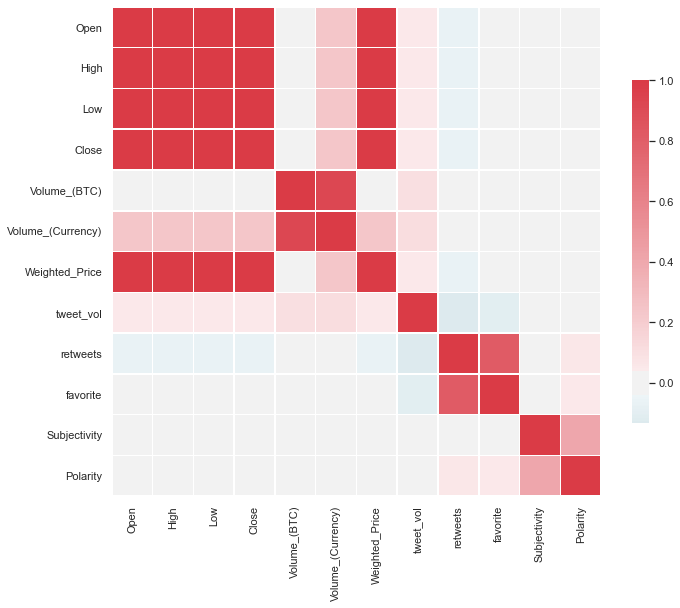

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax =sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

### Daily analysis:

In [70]:
dataset=dataset.reset_index()
dataset

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,tweet_vol,retweets,favorite,Subjectivity,Polarity
0,2018-04-16 00:00:00,8372.504667,8380.823833,8364.678500,8373.761167,8.896991,74596.755687,8373.051181,1.0,0.000000,1.000000,0.000000,0.000000
1,2018-04-16 01:00:00,8368.185833,8376.746167,8361.826500,8368.242500,10.452368,87602.420848,8369.721091,1.0,62.000000,112.000000,0.000000,0.000000
2,2018-04-16 02:00:00,8200.823333,8209.884333,8190.136167,8197.195167,26.472746,216552.726250,8199.757776,3.0,72.333333,160.000000,0.783333,-0.205556
3,2018-04-16 03:00:00,8173.781500,8180.905167,8165.713167,8173.870167,5.685816,46467.996262,8173.793540,2.0,90.500000,602.000000,0.391667,0.330208
4,2018-04-16 04:00:00,8156.707167,8163.208833,8151.543167,8156.481667,4.695646,38287.282707,8156.594411,1.0,65.000000,97.000000,0.300000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21164,2020-09-13 20:00:00,10305.338000,10307.544167,10301.688167,10304.580333,1.500647,15463.513838,10305.393489,0.0,62.641639,196.111673,0.358270,0.119458
21165,2020-09-13 21:00:00,10314.423333,10317.335667,10311.257167,10313.530000,1.350191,13928.412803,10314.803060,1.0,50.000000,314.000000,0.000000,0.000000
21166,2020-09-13 22:00:00,10308.809000,10311.824500,10306.730167,10309.446833,2.407102,24819.058853,10309.851250,19.0,2.000000,4.315789,0.279971,0.132895
21167,2020-09-13 23:00:00,10317.044333,10319.593333,10314.850667,10317.951333,2.552786,26349.128681,10318.042003,8.0,2.875000,10.750000,0.469097,0.228472


In [71]:
dataset["Timestamp"] = pd.to_datetime(dataset['Timestamp'])

In [72]:
daily_dataset_tweet_volume=dataset.groupby(pd.Grouper(key='Timestamp',freq='D'))['tweet_vol'].sum()

In [73]:
daily_dataset=dataset.groupby(pd.Grouper(key='Timestamp',freq='D'))['Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price',
       'favorite', 'Subjectivity', 'Polarity'].mean()

<ipython-input-73-1edc783c03a3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daily_dataset=dataset.groupby(pd.Grouper(key='Timestamp',freq='D'))['Open', 'High', 'Low', 'Close', 'Volume_(BTC)',


In [74]:
daily_dataset

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,favorite,Subjectivity,Polarity
Timestamp,,,,,,,,,,
2018-04-16,8080.050146,8086.099590,8073.745313,8080.020306,7.546252,61106.920980,8079.964367,189.679138,0.249705,0.108300
2018-04-17,8036.607528,8041.759243,8030.846500,8036.633618,6.442466,51709.732135,8036.063162,260.257925,0.330569,0.144570
2018-04-18,8057.208597,8061.578312,8051.895000,8057.312993,6.407781,51753.644044,8056.830537,242.062050,0.281760,0.079355
2018-04-19,8213.361544,8217.903180,8207.853388,8213.263314,6.560626,53864.700350,8212.919895,104.883096,0.358753,0.107818
2018-04-20,8445.218069,8450.221687,8439.539007,8445.635604,11.152516,94630.486275,8445.136833,349.426839,0.231756,0.103734
...,...,...,...,...,...,...,...,...,...,...
2020-09-10,10338.716748,10343.514375,10334.247319,10338.715299,7.131391,73746.110312,10339.315123,158.681911,0.297835,0.147109
2020-09-11,10302.331955,10305.987280,10299.198678,10302.365012,3.658533,37684.352492,10303.157472,165.185488,0.406935,0.172471
2020-09-12,10372.628869,10375.327667,10370.248650,10372.443402,1.752966,18181.633929,10373.117783,167.150084,0.268050,0.099601


In [75]:
daily_dataset.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,favorite,Subjectivity,Polarity
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,7613.136204,7617.264224,7608.984058,7613.056328,5.981305,45375.995006,7613.264994,195.898830,0.357881,0.119329
std,2295.918983,2297.572155,2294.281674,2295.822235,4.293572,36290.581788,2296.054405,86.946454,0.047046,0.037052
min,3179.896415,3181.190258,3178.762658,3180.066574,0.804251,5267.615915,3179.924191,0.000000,0.000000,-0.000860
25%,6334.988602,6336.205925,6333.890848,6335.104552,3.216813,21064.951902,6335.016398,137.315050,0.330472,0.095534
50%,7692.548169,7695.886238,7689.074882,7692.530343,4.919949,35222.602722,7692.374522,183.723166,0.357013,0.116868
75%,9341.852522,9347.784009,9336.838003,9342.126944,7.334186,57472.779012,9343.028343,233.381363,0.386878,0.142420
max,12650.574847,12664.774181,12636.019340,12649.908882,40.634298,331238.213844,12648.777230,957.592850,0.522106,0.265068


In [76]:
tweet_volum_day=daily_dataset_tweet_volume.to_frame()

In [77]:
daily_dataset["tweet_volum"] = tweet_volum_day

In [78]:
daily_dataset

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,favorite,Subjectivity,Polarity,tweet_volum
Timestamp,,,,,,,,,,,
2018-04-16,8080.050146,8086.099590,8073.745313,8080.020306,7.546252,61106.920980,8079.964367,189.679138,0.249705,0.108300,63.0
2018-04-17,8036.607528,8041.759243,8030.846500,8036.633618,6.442466,51709.732135,8036.063162,260.257925,0.330569,0.144570,129.0
2018-04-18,8057.208597,8061.578312,8051.895000,8057.312993,6.407781,51753.644044,8056.830537,242.062050,0.281760,0.079355,88.0
2018-04-19,8213.361544,8217.903180,8207.853388,8213.263314,6.560626,53864.700350,8212.919895,104.883096,0.358753,0.107818,94.0
2018-04-20,8445.218069,8450.221687,8439.539007,8445.635604,11.152516,94630.486275,8445.136833,349.426839,0.231756,0.103734,75.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-10,10338.716748,10343.514375,10334.247319,10338.715299,7.131391,73746.110312,10339.315123,158.681911,0.297835,0.147109,68.0
2020-09-11,10302.331955,10305.987280,10299.198678,10302.365012,3.658533,37684.352492,10303.157472,165.185488,0.406935,0.172471,106.0
2020-09-12,10372.628869,10375.327667,10370.248650,10372.443402,1.752966,18181.633929,10373.117783,167.150084,0.268050,0.099601,90.0


In [79]:
daily_dataset.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
favorite             0
Subjectivity         0
Polarity             0
tweet_volum          0
dtype: int64

In [80]:
Top_Vol = daily_dataset['Volume_(BTC)'].nlargest(10)
Top_Vol

Timestamp
2020-03-12    40.634298
2020-03-13    37.791418
2018-11-20    27.676787
2019-10-26    26.921521
2019-06-26    26.033196
2019-06-27    25.074278
2020-03-16    24.286716
2020-05-11    23.943127
2018-04-25    22.941600
2020-05-10    21.976420
Name: Volume_(BTC), dtype: float64

In [81]:
Top_Sen =daily_dataset['Subjectivity'].nlargest(10)
Top_Sen


Timestamp
2019-04-28    0.522106
2019-04-13    0.517775
2019-04-21    0.493627
2019-07-29    0.481264
2019-04-27    0.476903
2019-04-14    0.471918
2019-03-31    0.469801
2019-06-16    0.469621
2019-03-09    0.468956
2018-11-07    0.468164
Name: Subjectivity, dtype: float64

In [82]:
Top_Pol = daily_dataset['Polarity'].nlargest(10)
Top_Pol

Timestamp
2019-04-28    0.265068
2019-04-21    0.261150
2019-04-13    0.254928
2019-06-16    0.247880
2019-05-01    0.239991
2019-04-27    0.234664
2019-03-31    0.226688
2018-12-18    0.223231
2019-04-07    0.221189
2019-03-09    0.220259
Name: Polarity, dtype: float64

In [83]:
Top_Tweet = daily_dataset['tweet_volum'].nlargest(10)
Top_Tweet

Timestamp
2020-04-22    293.0
2020-04-02    285.0
2020-05-01    281.0
2020-04-01    269.0
2018-11-29    221.0
2020-05-11    212.0
2020-08-13    201.0
2018-11-27    193.0
2018-06-20    189.0
2020-05-12    188.0
Name: tweet_volum, dtype: float64

In [84]:
cor_daily = daily_dataset.corr()
cor_daily

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,favorite,Subjectivity,Polarity,tweet_volum
Open,1.000000,1.000000,0.999999,1.000000,-0.008431,0.400600,1.000000,-0.127294,-0.077962,-0.078335,0.144841
High,1.000000,1.000000,0.999998,0.999999,-0.007663,0.401316,0.999999,-0.127286,-0.077976,-0.078344,0.144992
Low,0.999999,0.999998,1.000000,0.999999,-0.009272,0.399813,1.000000,-0.127342,-0.077884,-0.078294,0.144721
Close,1.000000,0.999999,0.999999,1.000000,-0.008429,0.400608,1.000000,-0.127293,-0.077921,-0.078314,0.144892
Volume_(BTC),-0.008431,-0.007663,-0.009272,-0.008429,1.000000,0.868514,-0.008497,0.060509,-0.077571,-0.050336,0.257242
Volume_(Currency),0.400600,0.401316,0.399813,0.400608,0.868514,1.000000,0.400534,0.013319,-0.103409,-0.055363,0.276661
Weighted_Price,1.000000,0.999999,1.000000,1.000000,-0.008497,0.400534,1.000000,-0.127341,-0.077907,-0.078310,0.144867
favorite,-0.127294,-0.127286,-0.127342,-0.127293,0.060509,0.013319,-0.127341,1.000000,0.015023,0.082598,-0.355885
Subjectivity,-0.077962,-0.077976,-0.077884,-0.077921,-0.077571,-0.103409,-0.077907,0.015023,1.000000,0.517390,-0.078493
Polarity,-0.078335,-0.078344,-0.078294,-0.078314,-0.050336,-0.055363,-0.078310,0.082598,0.517390,1.000000,-0.125554


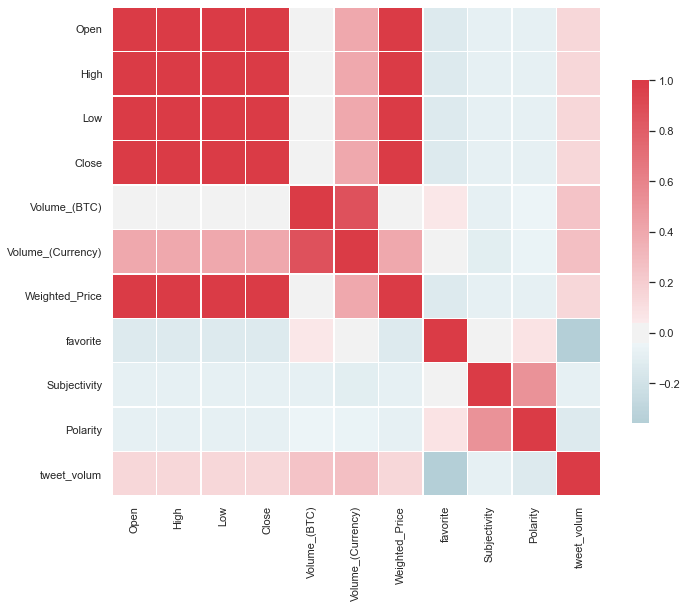

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax =sns.heatmap(cor_daily, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

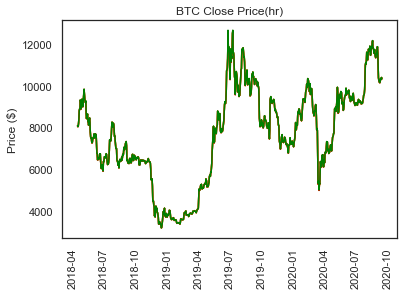

In [86]:
plt.plot(daily_dataset.index, daily_dataset['Close'], 'black')
plt.plot(daily_dataset.index, daily_dataset['Open'], 'yellow')
plt.plot(daily_dataset.index, daily_dataset['Low'], 'red')
plt.plot(daily_dataset.index, daily_dataset['High'], 'green')
plt.title('BTC Close Price(hr)')
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)');
plt.show();

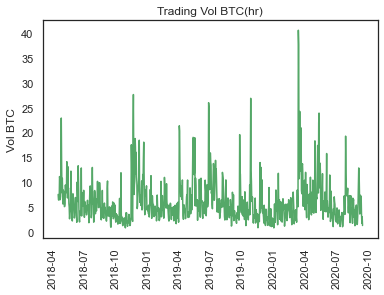

In [87]:
plt.plot(daily_dataset.index, daily_dataset['Volume_(BTC)'], 'g')
plt.title('Trading Vol BTC(hr)')
plt.xticks(rotation='vertical')
plt.ylabel('Vol BTC');
plt.show();

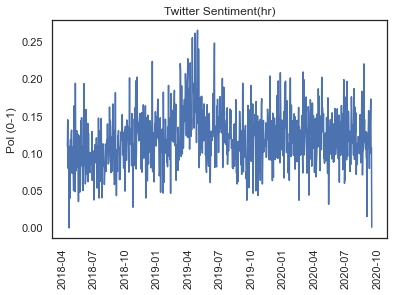

No handles with labels found to put in legend.


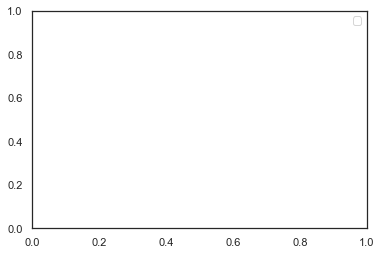

In [88]:
plt.plot(daily_dataset.index, daily_dataset['Polarity'], 'b')
plt.xticks(rotation='vertical')
plt.title('Twitter Sentiment(hr)')
plt.ylabel('Pol (0-1)');
plt.show();
plt.legend()

In [89]:
Top_Pol = daily_dataset['Polarity'].nsmallest(10)
Top_Pol

Timestamp
2018-04-21   -0.000860
2020-09-14    0.000000
2020-08-31    0.014522
2018-10-23    0.027013
2020-05-12    0.031064
2018-05-18    0.034638
2020-02-16    0.036379
2019-09-18    0.036417
2018-07-02    0.036733
2018-04-23    0.038958
Name: Polarity, dtype: float64

In [90]:
daily_dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price', 'favorite', 'Subjectivity', 'Polarity',
       'tweet_volum'],
      dtype='object')

In [91]:
df= daily_dataset.drop(columns=['Open', 'High', 'Low',
       'Weighted_Price', "Volume_(Currency)" ,'favorite', 'Subjectivity'])

In [92]:
df

,Close,Volume_(BTC),Polarity,tweet_volum
Timestamp,,,,
2018-04-16,8080.020306,7.546252,0.108300,63.0
2018-04-17,8036.633618,6.442466,0.144570,129.0
2018-04-18,8057.312993,6.407781,0.079355,88.0
2018-04-19,8213.263314,6.560626,0.107818,94.0
2018-04-20,8445.635604,11.152516,0.103734,75.0
...,...,...,...,...
2020-09-10,10338.715299,7.131391,0.147109,68.0
2020-09-11,10302.365012,3.658533,0.172471,106.0
2020-09-12,10372.443402,1.752966,0.099601,90.0


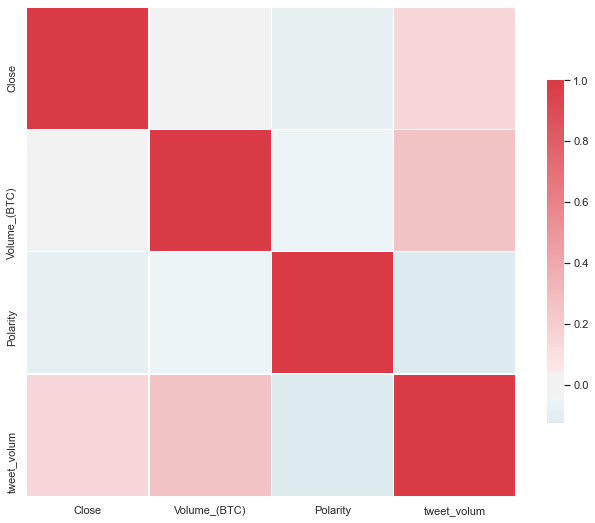

In [93]:
cor = df.corr()
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax =sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

In [94]:
df.to_csv("dataset_for_model.csv")

## 3. Preprocessing for the LSTM model